In [ ]:
class Order:
    def __init__(self, order_id, side, price, qty, time):
        self.order_id = order_id
        self.side = side
        self.price = price
        self.qty = qty
        self.time = time

    def __repr__(self):
        return f"{self.side.upper()} | Price: {self.price} | Qty: {self.qty}"


In [ ]:
class OrderBook:
    def __init__(self):
        self.bids = []
        self.asks = []
        self.trades = []
    def add_order(self, order):
        if order.side == "buy":
            self.bids.append(order)
            self.bids.sort(key=lambda x: (-x.price, x.time))
        else:
            self.asks.append(order)
            self.asks.sort(key=lambda x: (x.price, x.time))
        self.match()
    def match(self):
        while self.bids and self.asks:
            buy = self.bids[0]
            sell = self.asks[0]

            if buy.price >= sell.price:
                qty = min(buy.qty, sell.qty)
                price = sell.price

                self.trades.append((buy.order_id, sell.order_id, price, qty))

                buy.qty -= qty
                sell.qty -= qty

                if buy.qty == 0:
                    self.bids.pop(0)
                if sell.qty == 0:
                    self.asks.pop(0)
            else:
                break
    def show_book(self):
        print("\nBIDS:")
        for b in self.bids[:5]:
            print(b)

        print("\nASKS:")
        for a in self.asks[:5]:
            print(a)
ob = OrderBook()

test_orders = [
    Order(1, "buy", 100, 10, 1),
    Order(2, "buy", 101, 5, 2),
    Order(3, "sell", 102, 6, 3),
    Order(4, "sell", 100, 8, 4),
]

for o in test_orders:
    ob.add_order(o)

ob.show_book()

print("\nTRADES:")
for t in ob.trades:
    print(t)



BIDS:
BUY | Price: 100 | Qty: 7

ASKS:
SELL | Price: 102 | Qty: 6

TRADES:
(2, 4, 100, 5)
(1, 4, 100, 3)


In [ ]:
def spread(book):
    if book.bids and book.asks:
        return book.asks[0].price - book.bids[0].price
    return None

print("Spread:", spread(ob))


Spread: 2


In [ ]:
from collections import defaultdict

def depth(book):
    bid_d = defaultdict(int)
    ask_d = defaultdict(int)

    for b in book.bids:
        bid_d[b.price] += b.qty
    for a in book.asks:
        ask_d[a.price] += a.qty

    return bid_d, ask_d

bid_depth, ask_depth = depth(ob)


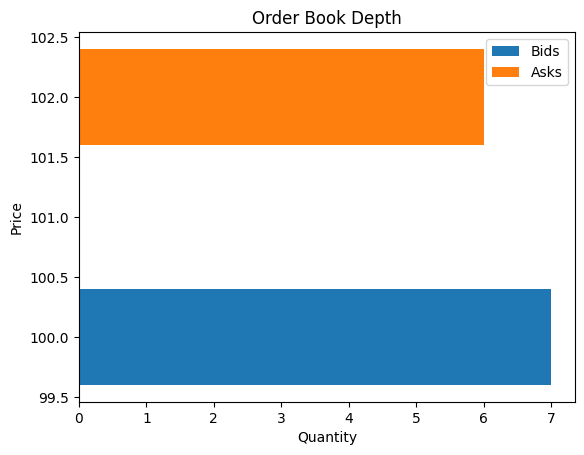

In [ ]:
import matplotlib.pyplot as plt

bp = sorted(bid_depth.keys(), reverse=True)
ap = sorted(ask_depth.keys())

bq = [bid_depth[p] for p in bp]
aq = [ask_depth[p] for p in ap]

plt.barh(bp, bq, label="Bids")
plt.barh(ap, aq, label="Asks")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.title("Order Book Depth")
plt.legend()
plt.show()
